<h2>Crime Rate Prediction - Open Problem</h2>

A US Census has been performed in the year 1990, and 1995 recording crime data across several communities and counties with the United states including more than 100 features of data characteristics ranging from the community name, racial profiles, household data, police deployment data and more, recording the amount of crimes per 100k population. Given this dataset, you are tasked to design an accurate predictive model that can estimate the crime behaviour of american communities as per the given datasets. <b>The following attributes are non-predictive and should not be considered: community_name, state, countyCode, communityCode and fold</b>. A full description of the dataset can be found in the link below: https://archive.ics.uci.edu/dataset/183/communities+and+crime


You are tasked with predicting the <b>amount of violent crime per population</b> after careful estimation of the relevant features.

In [26]:
import pandas as pd
df = pd.read_csv('..\\..\\datasets\\uci_crime_data\\crime_data.csv')
df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop\n
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59\n
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95\n
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51\n
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?\n
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79\n


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop

dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


<b>Step 1: Load your dataset and remove any impurities with the data</b>

In [28]:
Nrec = len(df)#number of records
Natts = len(df.columns)#number of attributes

for i in range(Natts):
    #df.iloc[:,[i]] = df.iloc[:,[i]].apply(lambda x: x.replace('?',''))
    #df.iloc[:,[i]] = df.iloc[:,[i]].apply(lambda x:x.replace('\n',''))
    if i > 1:
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='coerce')
df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop\n
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop

dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


In [30]:
print("Number of missing values:", df.isnull().any().sum())
df.dropna(inplace=True)

print("Number of missing values: -- after preprocessing", df.isnull().any().sum())

Number of missing values: 41
Number of missing values: -- after preprocessing 0


<b>Step 2: Identify the target variable and the potential predicive features</b>

In [31]:
df.rename(columns={'nonViolPerPop\n':'num_violent_crimes'},inplace=True)
X = df.iloc[:,5:145]
y = df.iloc[:,[146]]

In [32]:
X.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop
54,332943,2.54,19.70,76.96,1.05,3.97,14.78,28.65,14.52,12.25,...,1195.0,368.86,5502.0,1698.29,15251.0,4707.51,4517.0,1394.26,357.0,110.19
55,1585577,2.63,39.86,53.52,2.74,5.63,13.92,28.02,14.12,13.74,...,6821.0,445.86,15117.0,988.14,39181.0,2561.10,23785.0,1554.73,2282.0,149.17
58,66049,2.63,26.41,72.45,0.76,0.72,17.79,29.84,18.19,14.33,...,351.0,522.63,560.0,833.83,2316.0,3448.48,184.0,273.97,50.0,74.45
99,130474,2.66,36.14,53.85,2.41,13.22,17.06,34.55,19.17,10.81,...,1154.0,964.85,3417.0,2856.93,7719.0,6453.80,1873.0,1566.00,134.0,112.04
122,70487,2.59,17.38,81.61,0.51,0.65,16.05,28.26,15.37,13.59,...,786.0,1111.77,963.0,1362.13,4048.0,5725.76,457.0,646.41,6.0,8.49


In [33]:
y.head()

,num_violent_crimes
54,7910.25
55,5253.14
58,4630.73
99,10988.76
122,7742.79


<b>Step 3: Make use of the feature importance score of your choice to remove the least potent features</b>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [34]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

N_perc = 1#get 60% of the features 
featScaler = SelectKBest(mutual_info_regression, k=int(N_perc*Natts))
X_filtered = featScaler.fit_transform(X, y)
mask = featScaler.get_support()#
filtered_feats = X.columns[mask]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=147 is greater than n_features=140. All the features will be returned.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
print('Number of selected features:',len(filtered_feats))
filtered_feats

Number of selected features: 140


Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies',
       'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop'],
      dtype='object', length=140)

<b>Step 4: Normalise the feature vector</b>

In [36]:
from sklearn.preprocessing import StandardScaler

Sc = StandardScaler()
X_sc = Sc.fit_transform(X)#features are normalised
X_sc = pd.DataFrame(X_sc, columns = X.columns)

<b>Step 5: Split the datasets into Training and Test using 80/20 proportion</b>

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X_sc,y, test_size=0.2, random_state=1234)

<b>Step 6: List your models of interest for the training phase</b>

In [38]:
#-- (1) Linear Regression
#---(2) Ridge Regression
#-- (3) LASSO Regression
#-- (4) Decision Trees
#-- (5) Random Forest

<b>Step 7: Set aside 20% of your training set data to build a validation set for hyperparemeter tuning or make use of k-fold crossvalidation (k=5)</b>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*0DKYwS627160j5YMu6aGXw.png" width="500px"/>

Go through this documentation: <br/>
<b>Crossvalidation:</b>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

<b>GridSearch Hyperparameter tuning:</b>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#examples-using-sklearn-model-selection-gridsearchcv


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt_parameters = {'max_depth':[None, 10], 'min_samples_leaf':[1,2,3,4,5]}

mlr = LinearRegression()
dt = DecisionTreeRegressor()
dt_regression = GridSearchCV(dt, dt_parameters,cv=5)
dt_regression.fit(X_train.loc[:,filtered_feats],y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [40]:
dt_regression.best_params_

{'max_depth': 10, 'min_samples_leaf': 1}

In [41]:
dt_regression.best_score_

0.7344837856396895

<b>Step 8: Retrain the models with the training dataset using the best hyperparemeter configuration</b>

In [42]:
dt_regressor = DecisionTreeRegressor(max_depth=dt_regression.best_params_['max_depth'],min_samples_leaf=dt_regression.best_params_['min_samples_leaf'])
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

<b>Step 9: Assess the performance of the models on the test set. Use the R2-score and RMSE as your metrics and provide goodness of fit scatter plots (i.e on the test set result only)</b>

Text(0.5, 1.0, 'R2 score- test - DT: 0.64')

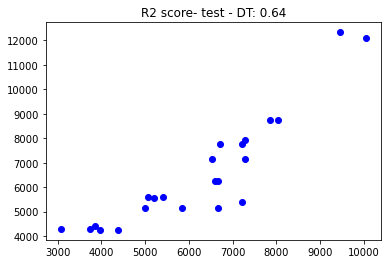

In [43]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_test = dt_regressor.predict(X_test)
r2_score_test_dt = metrics.r2_score(y_test,y_pred_test)

plt.figure()
plt.scatter(y_test,y_pred_test,color="blue")
plt.title('R2 score- test - DT: %.2f'%(r2_score_test_dt))



<b>Step 10: Attempt performing feature selection using a wrapper-based method and assess the performance of the models obtained. </b>

Read the documentation below: 
https://scikit-learn.org/stable/modules/feature_selection.html

In [44]:
#-->  All_features_model
#--> Filtered_features

#---> run your model from hyperparatmer tuning
#---> retrain the model using the best cofiguratio

#---> test perform for all_features_model
#---> filtered_features_model


#(-optinona)
#wrapper_filtering on rhe filtered_features or all the features


In [45]:
from sklearn.feature_selection import SequentialFeatureSelector

dt = DecisionTreeRegressor()
sfs = SequentialFeatureSelector(dt, n_features_to_select=int(len(X_train.columns)*0.2))
sfs.fit(X_train, y_train)

mask = sfs.get_support()
mask

array([False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [46]:
feats_feats = X_train.columns[mask]
feats_feats

Index(['agePct16t24', 'pctUrban', 'MedNumBR', 'HousVacant', 'RentMedian',
       'PctSameState85', 'RacialMatchCommPol', 'PctPolicBlack',
       'PctPolicMinor', 'robberies', 'burglPerPop', 'larcPerPop',
       'autoTheftPerPop', 'arsons'],
      dtype='object')

Text(0.5, 1.0, 'R2 score- test - DT: 0.83')

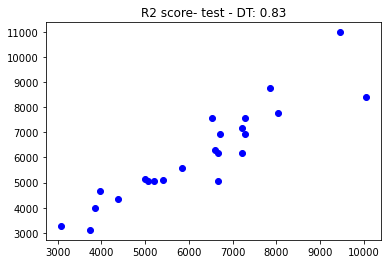

In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt

dt_regressor.fit(X_train.loc[:,feats_feats],y_train)
y_pred_test = dt_regressor.predict(X_test.loc[:,feats_feats])
r2_score_test_dt = metrics.r2_score(y_test,y_pred_test)

plt.figure()
plt.scatter(y_test,y_pred_test,color="blue")
plt.title('R2 score- test - DT: %.2f'%(r2_score_test_dt))